<a href="https://colab.research.google.com/github/setthawut8/ai/blob/main/eda/%20%5BTabular%5D_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

inspiration: 

https://medium.com/analytics-vidhya/pycaret-101-for-beginners-27d9aefd34c5

https://insaid.medium.com/a-complete-guide-to-pycaret-c07b1e51f698

#Library and Installation

In [ ]:
!pip install pycaret[full]

In [ ]:
#Access to kaggle and download the data
!gdown --id 19xQX20kpYtwlWbz9WEATDJ2DyDihWbLx #Download Kaggle JSON File

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c tabular-playground-series-jul-2022 #download data from the Kaggle competition

In [4]:
#Unzip the data files
!unzip '/content/tabular-playground-series-jul-2022.zip'

Archive:  /content/tabular-playground-series-jul-2022.zip
  inflating: data.csv                
  inflating: sample_submission.csv   


#EDA

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as plt
import matplotlib

In [6]:
data = pd.read_csv('/content/data.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

In [7]:
data.head(5)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [8]:
sample_submission.head(5)

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


inspiration: https://www.google.com/url?q=https://towardsdatascience.com/advanced-missing-data-imputation-methods-with-sklearn-d9875cbcc6eb&sa=D&source=editors&ust=1658122669195868&usg=AOvVaw3tixP-nsSSzzdRN3DPsfbx

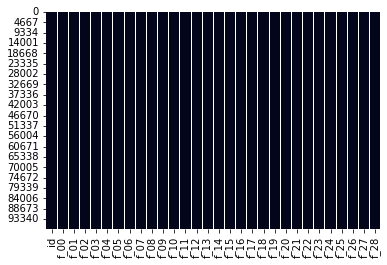

In [15]:
#Plot to see the missing values

#change version of the matplotlib first to be able to enable heatmap as follows:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

# check for missing values in the
sns.heatmap(data.isnull(), cbar=False)

In [47]:
#Find mean of is-nulled data
data.isnull().mean().sort_values(ascending=False)

id      0.0
f_00    0.0
f_27    0.0
f_26    0.0
f_25    0.0
f_24    0.0
f_23    0.0
f_22    0.0
f_21    0.0
f_20    0.0
f_19    0.0
f_18    0.0
f_17    0.0
f_16    0.0
f_15    0.0
f_14    0.0
f_13    0.0
f_12    0.0
f_11    0.0
f_10    0.0
f_09    0.0
f_08    0.0
f_07    0.0
f_06    0.0
f_05    0.0
f_04    0.0
f_03    0.0
f_02    0.0
f_01    0.0
f_28    0.0
dtype: float64

In [48]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


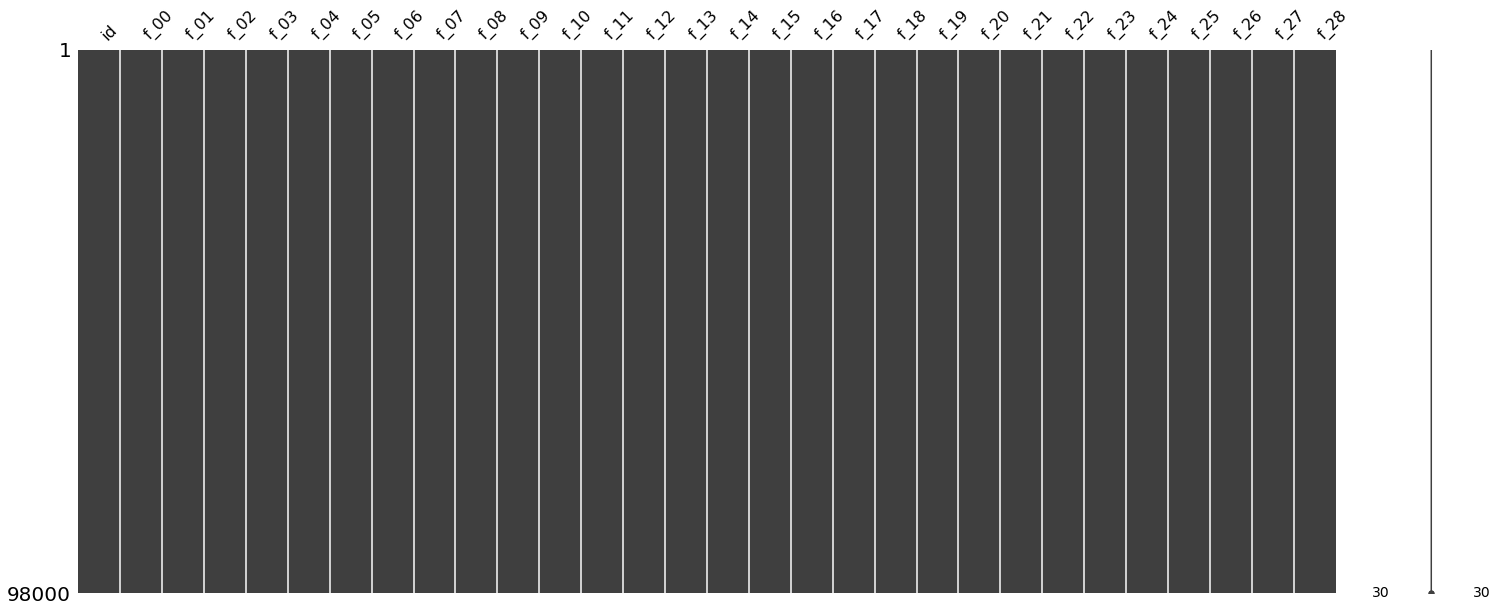

In [49]:
#the more white spaces, the more missing data.
import missingno as msno
msno.matrix(data)

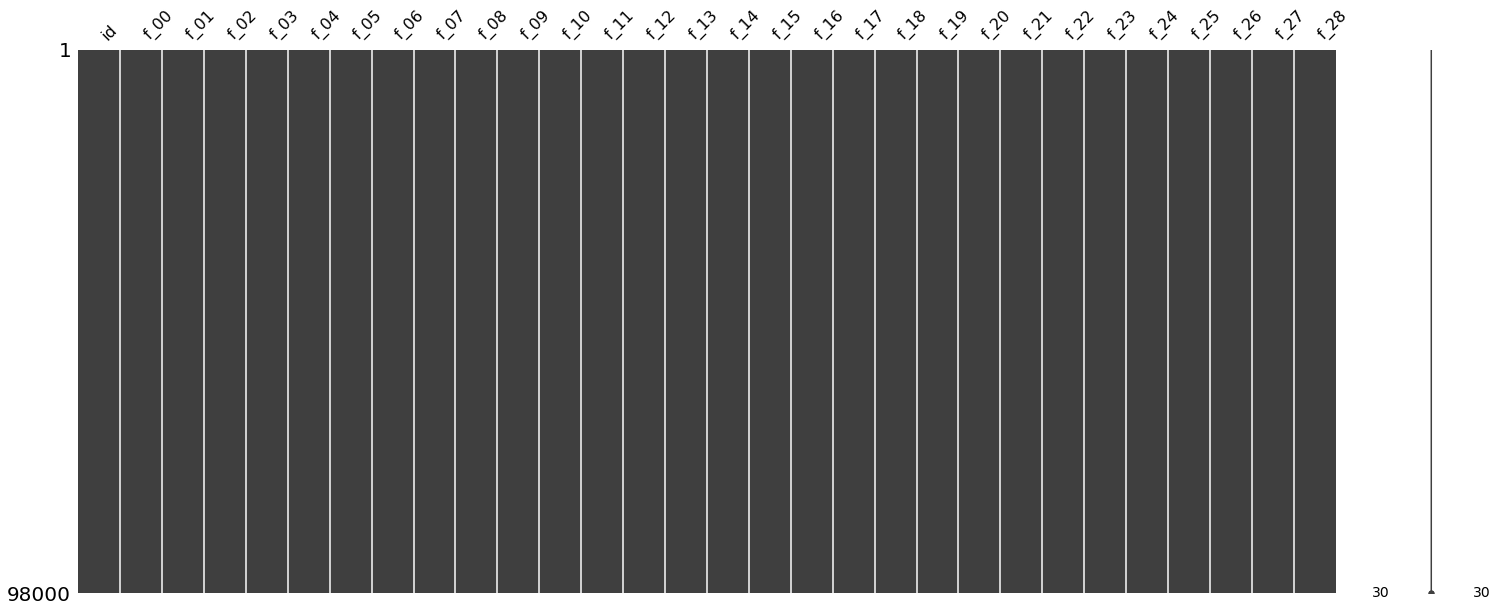

In [53]:
#See correlation of others with f_05
msno.matrix(data.sort_values("f_05"))